In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Get the data
trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')

In [8]:
trainData.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

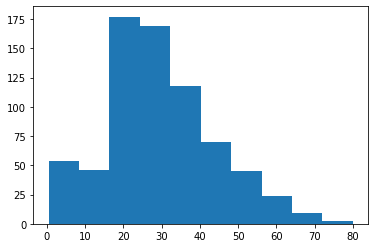

In [11]:
plt.hist(trainData['Age'])

In [12]:
trainData['Age'].fillna(trainData['Age'].mean(), inplace = True)

In [13]:
trainData.dropna(subset = ['Embarked'], inplace=True)

In [14]:
trainData.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [15]:
var = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']

In [16]:
X_train = trainData[var].values

In [17]:
X_train

array([[3, 'male', 22.0, ..., 0, 7.25, 'S'],
       [1, 'female', 38.0, ..., 0, 71.2833, 'C'],
       [3, 'female', 26.0, ..., 0, 7.925, 'S'],
       ...,
       [3, 'female', 29.69911764705882, ..., 2, 23.45, 'S'],
       [1, 'male', 26.0, ..., 0, 30.0, 'C'],
       [3, 'male', 32.0, ..., 0, 7.75, 'Q']], dtype=object)

In [18]:
from sklearn.preprocessing import LabelEncoder

label_encoder_Pclass = LabelEncoder()
label_encoder_Sex = LabelEncoder()
label_encoder_Embarked = LabelEncoder()

X_train[:, 1] = label_encoder_Sex.fit_transform(X_train[:, 1])
X_train[:, 0] = label_encoder_Pclass.fit_transform(X_train[:, 0])
X_train[:, 6] = label_encoder_Embarked.fit_transform(X_train[:, 6])

In [19]:
y_train = trainData['Survived']

In [20]:
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

## Train

In [93]:
from sklearn.model_selection import train_test_split

X_1, X_2, y_1, y_2 = train_test_split(X_train, y_train, test_size = 0.5, random_state=0)

In [94]:
# Import do algoritmo

from sklearn.tree import DecisionTreeClassifier

#tree_survived = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree_survived = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=8, random_state=0)
tree_survived.fit(X_1, y_1)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## Validation

In [95]:
from sklearn.metrics import accuracy_score

result = tree_survived.predict(X_2)
accuracy_score(y_2, result)

0.7707865168539326

## Teste

In [22]:
X_prev = testData[var]

In [23]:
X_prev['Age'].fillna(X_prev['Age'].mean(), inplace = True)
X_prev['Fare'].fillna(X_prev['Fare'].mean(), inplace = True)

/home/mateus/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [24]:
label_encoder_Pclass = LabelEncoder()
label_encoder_Sex = LabelEncoder()
label_encoder_Embarked = LabelEncoder()

X_prev.iloc[:, 1] = label_encoder_Sex.fit_transform(X_prev.iloc[:, 1])
X_prev.iloc[:, 0] = label_encoder_Pclass.fit_transform(X_prev.iloc[:, 0])
X_prev.iloc[:, 6] = label_encoder_Embarked.fit_transform(X_prev.iloc[:, 6])

/home/mateus/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [25]:
p = tree_survived.predict(X_prev)

In [26]:
# Max_depth
# None Accuracy = 0.758427 Error = 0.4915
# 1 Accuracy = 0.831461 Error = 0.4105
# 2 Accuracy = 0.747191 Error = 0.5028
# 3 Accuracy = 0.848315 Error = 0.3894
# 5 Accuracy = 0.831461 Error = 0.4105
# 8 Accuracy = 0.820225 Error = 0.4239
# 13 Accuracy = 0.775281 Error = 0.4740

# min_samples_leaf
# 2 Accuracy = 0.764045 Error = 0.4857
# 3 Accuracy = 0.797753 Error = 0.4497
# 5 Accuracy = 0.837079 Error = 0.4036
# 8 Accuracy = 0.848315 Error = 0.3894
# 13 Accuracy = 0.825843 Error = 0.4173

## Train Random Forest

In [74]:
from sklearn.model_selection import train_test_split

X_1, X_2, y_1, y_2 = train_test_split(X_train, y_train, test_size = 0.5, random_state=0)

In [75]:
# Experimento utilizando randomforest

from sklearn.ensemble import RandomForestClassifier

forest_survived = RandomForestClassifier(n_estimators=10, min_samples_leaf=2,
                                        random_state=0, max_features=2)
forest_survived.fit(X_train, y_train)

RandomForestClassifier(max_features=2, min_samples_leaf=2, n_estimators=10,
                       random_state=0)

## Validation

In [76]:
from sklearn.metrics import accuracy_score

result_rf = forest_survived.predict(X_2)
accuracy_score(y_2, result_rf)

0.8898876404494382

In [77]:
p = forest_survived.predict(X_prev)

## Train Logistic Regression

In [71]:
from sklearn.model_selection import train_test_split

X_1, X_2, y_1, y_2 = train_test_split(X_train, y_train, test_size = 0.5, random_state=0)

In [72]:
from sklearn.linear_model import LogisticRegression

rl_survived = LogisticRegression()
rl_survived.fit(X_train, y_train)

LogisticRegression()

## Validation

In [73]:
from sklearn.metrics import accuracy_score

result_rl = rl_survived.predict(X_2)
accuracy_score(y_2, result_rl)

0.7910112359550562

In [31]:
p = forest_survived.predict(X_prev)

## Submission

In [78]:
sub = pd.Series(p, index=testData['PassengerId'], name='Survived')

In [79]:
sub.head()

PassengerId
892    0
893    0
894    0
895    0
896    0
Name: Survived, dtype: int64

In [80]:
sub.to_csv('quarto_modelo.csv',header=True)